In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "/content/perkinson.xlsx"  # Replace with your actual dataset path
data = pd.read_excel(file_path)

In [3]:
# Display the first few rows of the dataset to ensure it's loaded correctly
print(data.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [4]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Accuracy: 94.87%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

Confusion Matrix:
[[ 5  2]
 [ 0 32]]
ROC AUC Score: 0.91


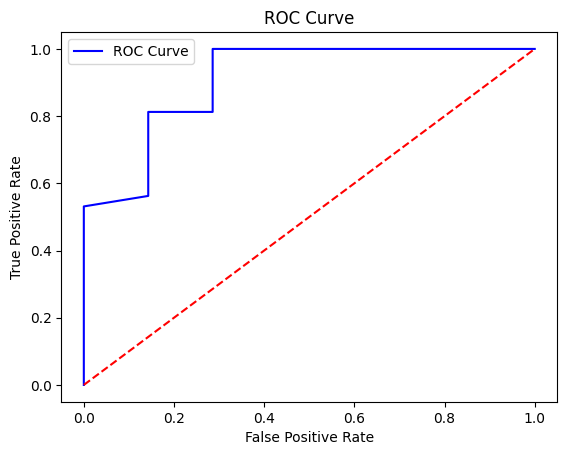

In [6]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Split dataset into features and target
X = data.drop(columns=["status", "name"])  # Features
y = data["status"]  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC AUC Score
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {auc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [8]:
# Test prediction of status using a numpy array
test_array = np.array([119.992, 157.302, 74.997, 0.00784, 0.00007, 0.0037, 0.00554, 0.01109, 0.04374, 0.426, 0.02182, 0.0313, 0.02971, 0.06545, 0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442, 0.284654])
prediction = model.predict(test_array.reshape(1, -1))

# Print prediction result
if prediction[0] == 1:
    print("Clinical Diagnosis: The patient exhibits symptoms consistent with Parkinson's disease.")
    print("Recommendation: Further neurological evaluation and diagnostic testing are warranted to confirm the diagnosis.")
else:
    print("Clinical Diagnosis: The patient does not exhibit symptoms consistent with Parkinson's disease.")
    print("Recommendation: Continue to monitor the patient's symptoms and consider alternative diagnoses.")


Clinical Diagnosis: The patient exhibits symptoms consistent with Parkinson's disease.
Recommendation: Further neurological evaluation and diagnostic testing are warranted to confirm the diagnosis.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


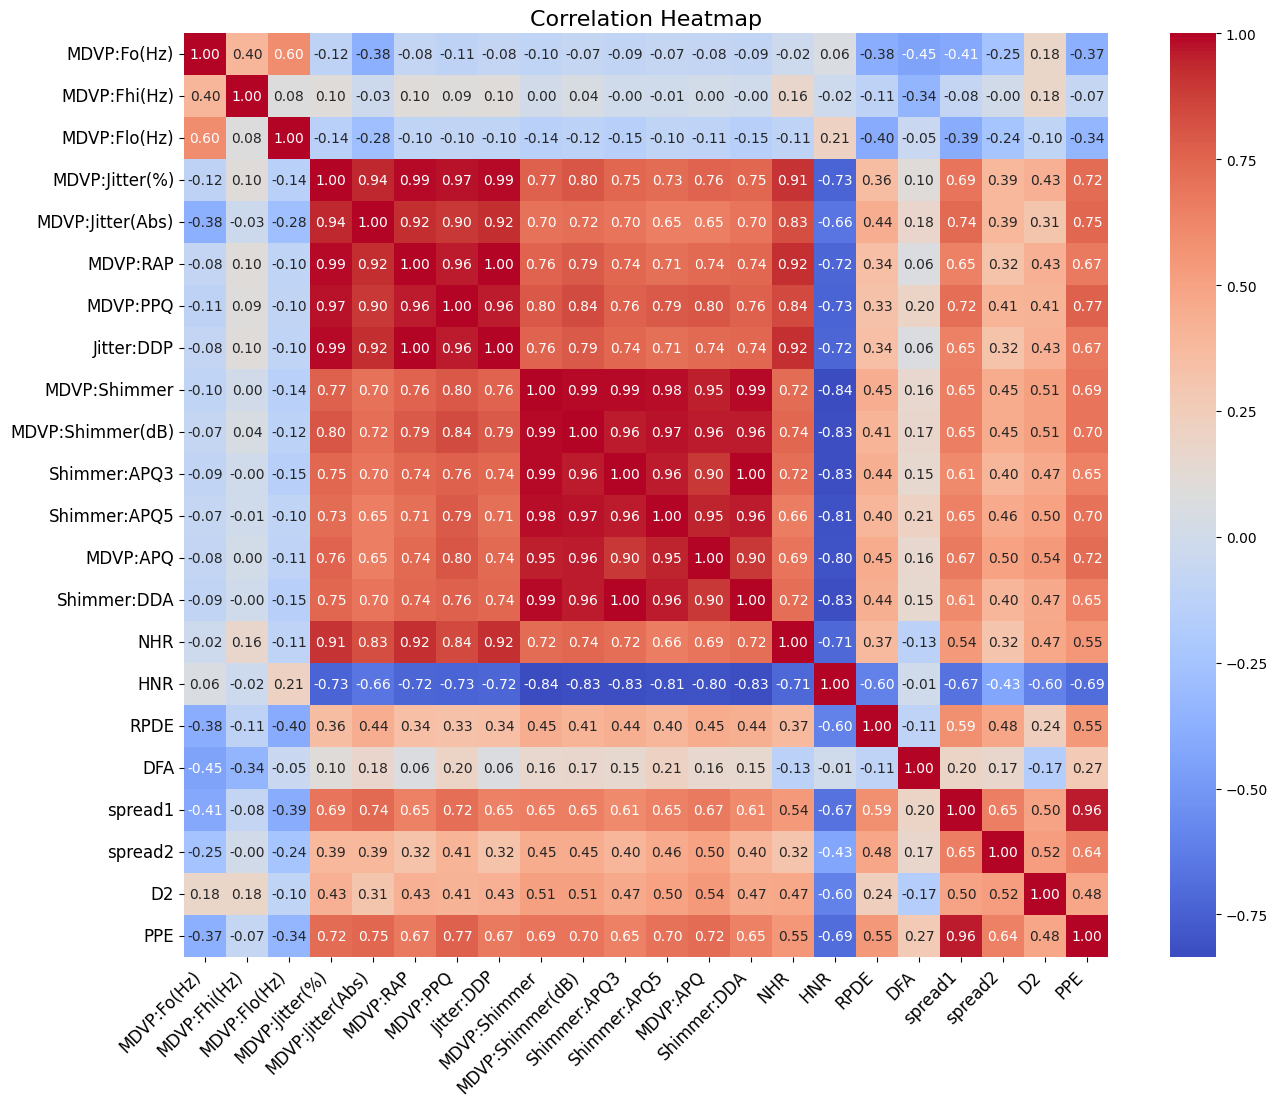


Significant Correlations (absolute value >= 0.6):
MDVP:Jitter(Abs) and MDVP:Jitter(%): 0.94
MDVP:RAP and MDVP:Jitter(%): 0.99
MDVP:RAP and MDVP:Jitter(Abs): 0.92
MDVP:PPQ and MDVP:Jitter(%): 0.97
MDVP:PPQ and MDVP:Jitter(Abs): 0.90
MDVP:PPQ and MDVP:RAP: 0.96
Jitter:DDP and MDVP:Jitter(%): 0.99
Jitter:DDP and MDVP:Jitter(Abs): 0.92
Jitter:DDP and MDVP:RAP: 1.00
Jitter:DDP and MDVP:PPQ: 0.96
MDVP:Shimmer and MDVP:Jitter(%): 0.77
MDVP:Shimmer and MDVP:Jitter(Abs): 0.70
MDVP:Shimmer and MDVP:RAP: 0.76
MDVP:Shimmer and MDVP:PPQ: 0.80
MDVP:Shimmer and Jitter:DDP: 0.76
MDVP:Shimmer(dB) and MDVP:Jitter(%): 0.80
MDVP:Shimmer(dB) and MDVP:Jitter(Abs): 0.72
MDVP:Shimmer(dB) and MDVP:RAP: 0.79
MDVP:Shimmer(dB) and MDVP:PPQ: 0.84
MDVP:Shimmer(dB) and Jitter:DDP: 0.79
MDVP:Shimmer(dB) and MDVP:Shimmer: 0.99
Shimmer:APQ3 and MDVP:Jitter(%): 0.75
Shimmer:APQ3 and MDVP:Jitter(Abs): 0.70
Shimmer:APQ3 and MDVP:RAP: 0.74
Shimmer:APQ3 and MDVP:PPQ: 0.76
Shimmer:APQ3 and Jitter:DDP: 0.74
Shimmer:APQ3 and 

In [11]:
import seaborn as sns
import numpy as np

# Correlation Heatmap for Numerical Columns
corr_matrix = X.corr()

# Increase figure size for better visibility
plt.figure(figsize=(16, 12))  # Adjusted to 16x12 inches

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", annot_kws={"size": 10})

# Set title
plt.title('Correlation Heatmap', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Display heatmap
plt.show()

# Identify and print significant correlations (threshold: +/- 0.6)
significant_correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= 0.6:
            significant_correlations.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print("\nSignificant Correlations (absolute value >= 0.6):")
for col1, col2, corr_value in significant_correlations:
    print(f"{col1} and {col2}: {corr_value:.2f}")

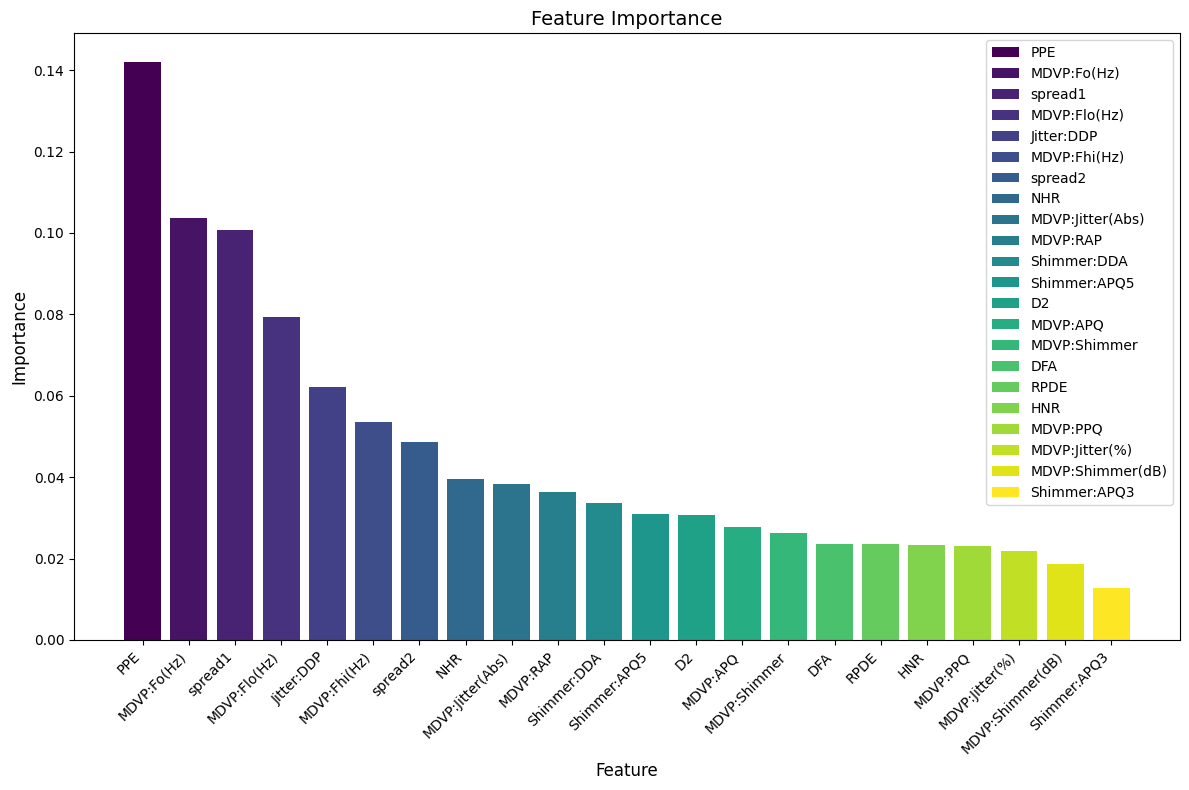

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importance
feature_importance = rfc.feature_importances_

# Create dataframe with feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort dataframe by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance with enhanced readability and colors
plt.figure(figsize=(12, 8))  # Increased figure size for better visibility

# Generate a color palette for the bars
num_features = len(feature_importance_df)
colors = plt.cm.viridis(np.linspace(0, 1, num_features))  # Using viridis colormap

# Create the bar plot with individual colors and labels
bars = plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)

# Add labels, title, and legend
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importance', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Create a legend with feature names and corresponding colors
plt.legend(bars, feature_importance_df['Feature'], fontsize=10)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import partial_dependence, plot_partial_dependence

# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Create partial dependence plot
plot_partial_dependence(rfc, X_train, ['MDVP:Fo(Hz)'])
plt.show()

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/usr/local/lib/python3.11/dist-packages/sklearn/inspection/__init__.py)

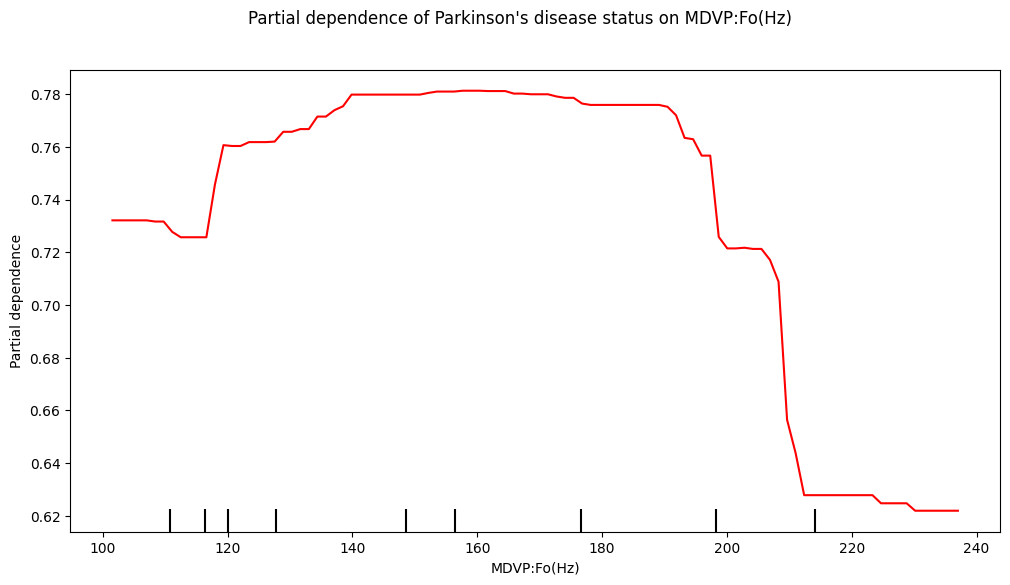

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay # Import PartialDependenceDisplay instead

# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Create partial dependence plot using PartialDependenceDisplay
# Display for a single feature
fig, ax = plt.subplots(figsize=(12, 6))
display = PartialDependenceDisplay.from_estimator(
    rfc,
    X_train,
    ['MDVP:Fo(Hz)'], # Features for partial dependence
    ax=ax,
    line_kw={"color": "red"},
)
display.figure_.suptitle(
    "Partial dependence of Parkinson's disease status on MDVP:Fo(Hz)" # Changed subtitle
)

plt.show()

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Create SHAP explainer
explainer = shap.TreeExplainer(rfc)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP values for the first prediction
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[0])
plt.show()

# or for all predictions (with a loop)
# for i in range(shap_values.shape[0]):  # changed this to [0]
#     shap.force_plot(explainer.expected_value[0], shap_values[i][0], X_test.iloc[i]) # changed this to [0]
#     plt.show()

DimensionError: Length of features is not equal to the length of shap_values!

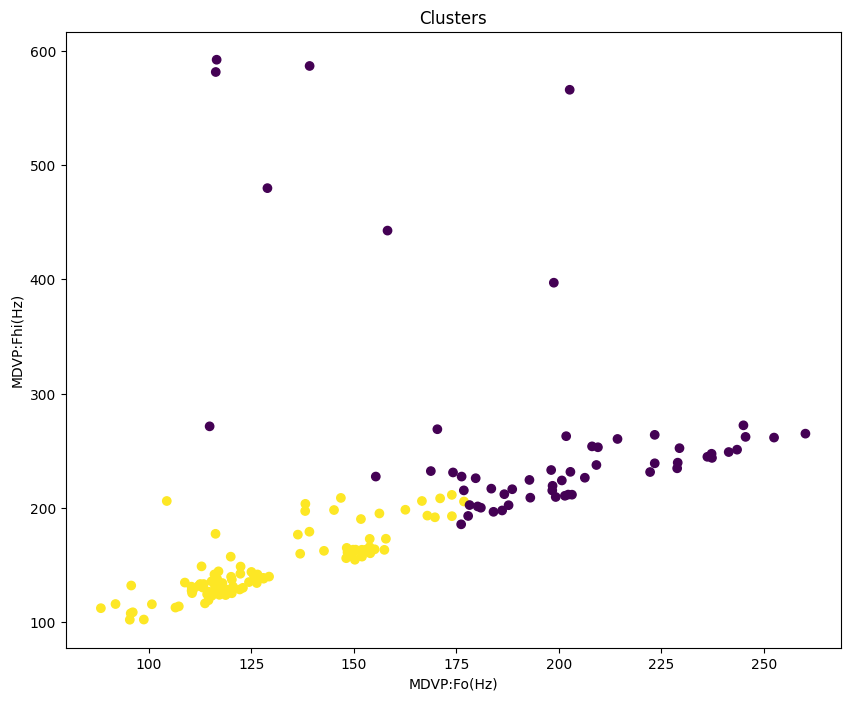

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create KMeans clustering model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit KMeans model to data
kmeans.fit(X_train)

# Predict clusters
clusters = kmeans.predict(X_train)

# Plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_train['MDVP:Fo(Hz)'], X_train['MDVP:Fhi(Hz)'], c=clusters)
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('MDVP:Fhi(Hz)')
plt.title('Clusters')
plt.show()


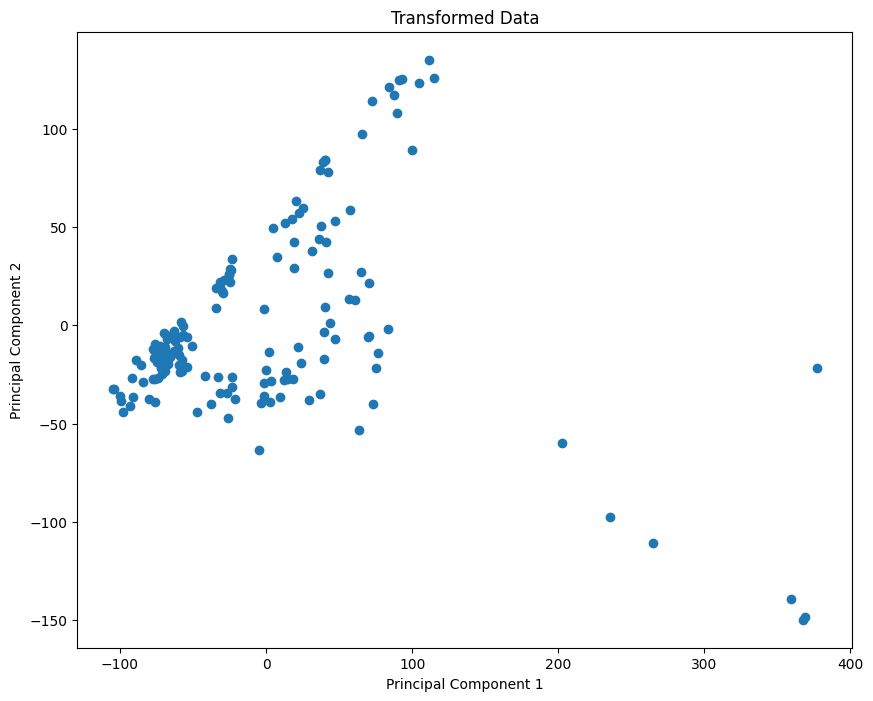

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create PCA dimensionality reduction model
pca = PCA(n_components=2, random_state=42)

# Fit PCA model to data
pca.fit(X_train)

# Transform data
transformed_data = pca.transform(X_train)

# Plot transformed data
plt.figure(figsize=(10, 8))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Transformed Data')
plt.show()